# <font color=brown>Brazil Weather, Automatic Stations (2000-2021)</font>

## Content

The climate in Brazil varies considerably from mostly tropical north (the equator traverses the mouth of the Amazon) to temperate zones south of the Tropic of Capricorn (23°26' S latitude).So this dataset contains historical temperature, precipitation, humidity, and windspeed for Brazil.Meteorological data observed in automatic meteorological stations of the National Institute of Meteorology - INMET distributed in the Brazilian territory from 2000 to January, 2021. https://www.kaggle.com/saraivaufc/automatic-weather-stations-brazil Metadata: https://www.kaggle.com/saraivaufc/automatic-weather-stations-brazil/metadata.The time parameter is taken in UTC standard.The Dataset is designed for every hours per day,which gives clear vision about the weather.

## <font color="brown">Dataset Attributes</font>

- REGIAO : Region                                                       
- UF : State code for Brazil                                                            
- ESTACAO : Station name                                                       
- CODIGO  : Station code                                                        
- LATITUDE  : Latitude                                                    
- LONGITUDE : Longitude                                                   
- ALTITUDE  : Altitude                                                    
- DATA (YYYY-MM-DD) : Date (YYYY-MM-DD)                                             
- HORA : HOURs(Time in  (UTC))                                                   
- PRECIPITACAO TOTAL HORARIO (mm) : Accumulated Precipitation hourly (mm)                         
- PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB) : Atmospheric Pressure at the station level (mB)   
- PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB) : Maximum atmospheric pressure (mB)        
- PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB) : Minimum atmospheric pressure (mB)        
- RADIACAO GLOBAL (W/m2)  :  Global radiation (Kj/m²)                                
- TEMPERATURA DO AR - BULBO SECO, HORARIA (C) : Air temperature - DRY BULB (°C)             
- TEMPERATURA DO PONTO DE ORVALHO (C) :  Dew point temperature (°C)                    
- TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C) :  Maximum temperature (°C)              
- TEMPERATURA MINIMA NA HORA ANT. (AUT) (C) : Minimum temperature (°C)               
- TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (C) : Maximum dew point temperature (°C)          
- TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (C) :  Minimum dew point temperature (° C)        
- UMIDADE REL. MAX. NA HORA ANT. (AUT) (%) : Maximum relative humidity (%)                
- UMIDADE REL. MIN. NA HORA ANT. (AUT) (%) :  Minimum relative humidity (%)               
- UMIDADE RELATIVA DO AR, HORARIA (%) :  Relative humidity (%)                    
- VENTO, DIRECAO HORARIA (gr) : Wind direction (°gr)                             
- VENTO, RAJADA MAXIMA (m/s) : Wind gust (m/s)                              
- VENTO, VELOCIDADE HORARIA (m/s) : Wind speed (m/s)

## <font color="brown">Our Objective</font>

- As we have selected the dataset "Brazil Weather, Automatic Stations (2000-2021)" for **analysis** and **data visualization**,we will load the dataset.

- The size of the whole dataset is more than 6 GB.So we will select data from 2019 years onwards,so that the size of the dataframe will be reduced.

- For this task we will use **Dask** mainly for loading and analysis.And apart from that we will use **Numpy** for statistical analysis,**Matplotlib**,**Seaborn**,**Plotly** etc library for data visualization.

- Also we will use **Missingno** library to findout missing values.

- Though the whole dataset has data which is collected in every 1  hour for every day and every month from the year 2000 to 2021,our primary purpose of this analysis is to understand if there are any pattern about wind, air-temperartute and almospheric pressure across the Brazil, in terms of time, location,region

## Loading dataset & dataset info

In [1]:
#Import libraries for loading and analysising data
import numpy as np
import pandas as pd
import dask.dataframe as dd
from dask import compute
import glob
import os

#import missingno library
import missingno as msno

#import matplotlib and seaborn
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns



# plotly standard imports
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py

#Import cufflinks which is the wrapper of plotly
import cufflinks as cf

#Display all the cell output which will be interactive
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

#Set plotly+cufflinks in offline mode
from plotly.offline import iplot,init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline(connected=True)
cf.set_config_file(theme="pearl")

pd.set_option('display.max_columns', 30)

### Dask setup

In [2]:
from dask.distributed import Client
client=Client()
client

Client Scheduler: tcp://127.0.0.1:64622 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 16.51 GB


## Loading the dataset

In [3]:
# loading the first csv file as it containf 2 csv files
data1=pd.read_csv(r'C:\Users\sushr\Downloads\Brazil_Weather\automatic_stations_codes_2000_2021.csv',sep=";")

In [4]:
data1.head()

,REGIAO,UF,ESTACAO,CODIGO,LATITUDE,LONGITUDE,ALTITUDE
0,N,PA,SANTA MARIA DAS BARREIRAS,A256,-8.729722,-49.856389,165.00
1,SE,SP,CRIOSFERA,C891,-84.000000,-79.494167,1285.00
2,CO,DF,BRASILIA,A001,-15.789444,-47.925833,1159.54
3,NE,BA,SALVADOR,A401,-13.016667,-38.516667,51.41
4,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25


In [5]:
# checking the datatype of dataframe(data1)
type(data1)

pandas.core.frame.DataFrame

In [6]:
# shape of dataframe(data1)
data1.shape

(612, 7)

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   REGIAO     612 non-null    object 
 1   UF         612 non-null    object 
 2   ESTACAO    612 non-null    object 
 3   CODIGO     612 non-null    object 
 4   LATITUDE   612 non-null    float64
 5   LONGITUDE  612 non-null    float64
 6   ALTITUDE   612 non-null    float64
dtypes: float64(3), object(4)
memory usage: 33.6+ KB


In [8]:
# checking the column names
data1.columns

Index(['REGIAO', 'UF', 'ESTACAO', 'CODIGO', 'LATITUDE', 'LONGITUDE',
       'ALTITUDE'],
      dtype='object')

In [9]:
# renaming the column names
data1.rename(columns={'REGIAO': 'REGION',
                        'ESTACAO': 'STATION NAME',
                        'CODIGO': 'STATION CODE'
                       },
               inplace=True
              )

In [10]:
data1.head()

,REGION,UF,STATION NAME,STATION CODE,LATITUDE,LONGITUDE,ALTITUDE
0,N,PA,SANTA MARIA DAS BARREIRAS,A256,-8.729722,-49.856389,165.00
1,SE,SP,CRIOSFERA,C891,-84.000000,-79.494167,1285.00
2,CO,DF,BRASILIA,A001,-15.789444,-47.925833,1159.54
3,NE,BA,SALVADOR,A401,-13.016667,-38.516667,51.41
4,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25


In [11]:
# checking the null values
data1.isnull().sum()

REGION          0
UF              0
STATION NAME    0
STATION CODE    0
LATITUDE        0
LONGITUDE       0
ALTITUDE        0
dtype: int64

In [12]:
# checking the duplicate values
data1.duplicated().sum()

0

In [13]:
# count the sum of unique values of each column
for c in data1.columns:
    print(f'{c}:\n{len(data1[c].value_counts())}')

REGION:
5
UF:
27
STATION NAME:
609
STATION CODE:
612
LATITUDE:
610
LONGITUDE:
605
ALTITUDE:
465


### _**Abstract from above analysis**_
- Latitude, longitude and altitude look like geografical cordinates of individual stations.
- It is not yet clear why numbers of station names and station codes are not the same.
- It is not yet clear what "UF" stnds for
- It is not yet clear what are the 5 regions.

The **next task**: to clarify meaning of UF and relationship between REGION and UF.

In [14]:
# checking the unique value of column (UF)
uf = data1.groupby('REGION').UF.unique().apply(lambda x: sorted(x))
print(uf)

REGION
CO                        [DF, GO, MS, MT]
N             [AC, AM, AP, PA, RO, RR, TO]
NE    [AL, BA, CE, MA, PB, PE, PI, RN, SE]
S                             [PR, RS, SC]
SE                        [ES, MG, RJ, SP]
Name: UF, dtype: object


In [15]:
# writing a function to check whether the column contains overlapping values or not
def list_overlap(list_series):
    for x in list_series.index:
        for y in list_series.index:
            if x == y:
                continue
            if any([item in list_series[x] for item in list_series[y]]):
                print(f'l[{x}] overlap with l[{y}]')
                print(f'overlap: {[i for i in list_series[x] if i in list_series[y]]}\n')
    return 'No overlap'

In [16]:
# print the status of column(UF) using function ("list_overlap")
print(f'overlap of UF lists: {list_overlap(uf)}')

overlap of UF lists: No overlap


In [17]:
# print the unique value of column (STATION NAME)
sn = data1.groupby('UF')['STATION NAME'].unique().apply(lambda x: sorted(x))
print(sn)

UF
AC    [CRUZEIRO DO SUL, EPITACIOLANDIA, FEIJO, MAREC...
AL    [ARAPIRACA, CORURIPE, MACEIO, PALMEIRA DOS IND...
AM    [APUI, AUTAZES, BARCELOS, BOCA DO ACRE, COARI,...
AP            [ITAUBAL, MACAPA, OIAPOQUE, PORTO GRANDE]
BA    [ABROLHOS, AMARGOSA, BARRA, BARREIRAS, BELMONT...
CE    [ACARAU, BARBALHA, CAMPOS SALES, CRATEUS, FORT...
DF    [AGUAS EMENDADAS, BRASILIA, BRAZLANDIA, GAMA (...
ES    [AFONSO CLAUDIO, ALEGRE, ALFREDO CHAVES, ECOPO...
GO    [ALTO PARAISO DE GOIAS, ARAGARCAS, CAIAPONIA, ...
MA    [ALTO PARNAIBA, BACABAL, BALSAS, BARRA DO CORD...
MG    [AGUAS VERMELHAS, AIMORES, ALMENARA, ARACUAI, ...
MS    [AGUA CLARA, AMAMBAI, ANGELICA, AQUIDAUANA, AR...
MT    [AGUA BOA, ALTA FLORESTA, ALTO ARAGUAIA, ALTO ...
PA    [ALTAMIRA, BELEM, BRAGANCA, BREVES, CAMETA, CA...
PB    [AREIA, CABACEIRAS, CAMARATUBA, CAMPINA GRANDE...
PE    [ARCO VERDE, CABROBO, CARUARU, FLORESTA, GARAN...
PI    [ALVORADA DO GURGUEIA, ANGICAL DO PIAUI, BAIXA...
PR    [CAMPINA DA LAGOA, CASTRO, CIDADE GAUCH

In [18]:
# print the overlapping status of column (STATION NAME)
print(f'overlap of Station name lists: {list_overlap(sn)}')

l[BA] overlap with l[RJ]
overlap: ['VALENCA']

l[GO] overlap with l[SP]
overlap: ['SAO SIMAO']

l[RJ] overlap with l[BA]
overlap: ['VALENCA']

l[SP] overlap with l[GO]
overlap: ['SAO SIMAO']

overlap of Station name lists: No overlap


### ***Abstract from above analysis:***
- Each UF belong to one and only one REGION.
- it seems that "UF" stands for "Unidade Federal" that is codes for states in Brazil: https://pt.wikipedia.org/wiki/Distrito_Federal_(Brasil)
- It is not yet clear what "UF" stnds for
- It is not yet clear what are the 5 regions.
####  The next task: to clarify UF and STATION CODE.

In [19]:
# print the unique values of column (STATION CODE)
sc = data1.groupby('UF')['STATION CODE'].unique().apply(lambda x: sorted(x))
print(sc)

UF
AC           [A102, A104, A108, A136, A137, A138, A140]
AL           [A303, A323, A327, A353, A355, A356, A371]
AM    [A101, A109, A110, A111, A112, A113, A117, A11...
AP                             [A242, A244, A249, A251]
BA    [A401, A402, A404, A405, A406, A407, A408, A41...
CE    [A305, A306, A314, A315, A319, A324, A325, A33...
DF                       [A001, A042, A045, A046, A047]
ES    [A612, A613, A614, A615, A616, A617, A622, A62...
GO    [A002, A003, A005, A011, A012, A013, A014, A01...
MA    [A203, A204, A205, A206, A207, A217, A218, A21...
MG    [A502, A505, A506, A507, A508, A509, A510, A51...
MS    [A702, A703, A704, A709, A710, A717, A719, A72...
MT    [A901, A902, A903, A904, A905, A906, A907, A90...
PA    [A201, A202, A209, A210, A211, A212, A213, A21...
PB    [A310, A313, A320, A321, A333, A334, A348, A35...
PE    [A301, A307, A309, A322, A328, A329, A341, A34...
PI    [A308, A311, A312, A326, A330, A331, A335, A33...
PR    [A807, A818, A819, A820, A821, A822, A8

In [20]:
# print the overlapping status of column (STATION CODE)
print(f'overlap of Station code lists: {list_overlap(sc)}')

overlap of Station code lists: No overlap


### Abstract from above analysis:
- Each STATION CODE belong to one and only one REGION.
- It seems that "STATION" is the unique identifier of a weather station.
-The **next task**: to clarify relationship between UF and STATION NAME, and to find out why the number of unique station names is lower than the number of unique station codes.

##  Unique values for UF and STATION NAME

In [21]:
names_of_codes = data1.groupby('STATION CODE')['STATION NAME'].unique()
dups = names_of_codes[names_of_codes.duplicated()]
dups

STATION CODE
A611       [VALENCA]
A770     [SAO SIMAO]
S107    [DOM ELISEU]
Name: STATION NAME, dtype: object

In [22]:
dups = dups.map(lambda x: x[0])
dups

STATION CODE
A611       VALENCA
A770     SAO SIMAO
S107    DOM ELISEU
Name: STATION NAME, dtype: object

In [23]:
dups.values

array(['VALENCA', 'SAO SIMAO', 'DOM ELISEU'], dtype=object)

In [24]:
data1[data1['STATION NAME'].isin(dups)]

,REGION,UF,STATION NAME,STATION CODE,LATITUDE,LONGITUDE,ALTITUDE
66,CO,GO,SAO SIMAO,A011,-18.966667,-50.616667,488.51
120,SE,RJ,VALENCA,A611,-22.350000,-43.700000,367.00
419,NE,BA,VALENCA,A444,-13.343611,-39.126667,105.00
500,N,PA,DOM ELISEU,S107,-4.290000,-47.550000,0.00
591,N,PA,DOM ELISEU,A252,-4.280556,-47.563889,251.00
607,SE,SP,SAO SIMAO,A770,-21.461111,-47.579444,620.00


In [25]:
sn = data1.groupby('UF')['STATION NAME'].unique().apply(lambda x: sorted(x))
print(sn)

UF
AC    [CRUZEIRO DO SUL, EPITACIOLANDIA, FEIJO, MAREC...
AL    [ARAPIRACA, CORURIPE, MACEIO, PALMEIRA DOS IND...
AM    [APUI, AUTAZES, BARCELOS, BOCA DO ACRE, COARI,...
AP            [ITAUBAL, MACAPA, OIAPOQUE, PORTO GRANDE]
BA    [ABROLHOS, AMARGOSA, BARRA, BARREIRAS, BELMONT...
CE    [ACARAU, BARBALHA, CAMPOS SALES, CRATEUS, FORT...
DF    [AGUAS EMENDADAS, BRASILIA, BRAZLANDIA, GAMA (...
ES    [AFONSO CLAUDIO, ALEGRE, ALFREDO CHAVES, ECOPO...
GO    [ALTO PARAISO DE GOIAS, ARAGARCAS, CAIAPONIA, ...
MA    [ALTO PARNAIBA, BACABAL, BALSAS, BARRA DO CORD...
MG    [AGUAS VERMELHAS, AIMORES, ALMENARA, ARACUAI, ...
MS    [AGUA CLARA, AMAMBAI, ANGELICA, AQUIDAUANA, AR...
MT    [AGUA BOA, ALTA FLORESTA, ALTO ARAGUAIA, ALTO ...
PA    [ALTAMIRA, BELEM, BRAGANCA, BREVES, CAMETA, CA...
PB    [AREIA, CABACEIRAS, CAMARATUBA, CAMPINA GRANDE...
PE    [ARCO VERDE, CABROBO, CARUARU, FLORESTA, GARAN...
PI    [ALVORADA DO GURGUEIA, ANGICAL DO PIAUI, BAIXA...
PR    [CAMPINA DA LAGOA, CASTRO, CIDADE GAUCH

In [26]:
print(f'overlap of Station name lists: {list_overlap(sn)}')

l[BA] overlap with l[RJ]
overlap: ['VALENCA']

l[GO] overlap with l[SP]
overlap: ['SAO SIMAO']

l[RJ] overlap with l[BA]
overlap: ['VALENCA']

l[SP] overlap with l[GO]
overlap: ['SAO SIMAO']

overlap of Station name lists: No overlap


### *Abstract from above analysis*
- There are 3 cases when a name is used for 2 different unique stations.
- Station name DOM ELISEU is used for 2 stations in the same location but at different altitudes.
- Station names SAO SIMAO and VALENCIA are used for 2 pairs of locations in different states.
- Therefore STATION NAME (in contrast to STATION CODE) cannot be used as a unique location idendifier. STATION NAME is a complementary information. 

The **next task**: to visualize the station locations.

## **Basic geograpical maps**

##  Location of unique stations by REGION

### Plotting all stations

For plotting the entire data of latitude and longitude given in the dataframe (data1) ,we will use seaborn.lmplot.

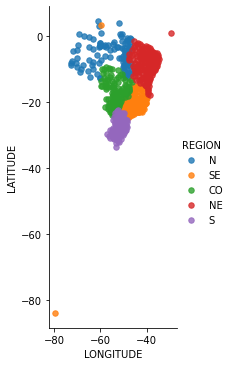

In [27]:
sns.lmplot(x="LONGITUDE", y="LATITUDE", data=data1,
           fit_reg=False, scatter_kws={"s": 30}, hue='REGION', aspect=0.5);

From above graph,we can see the ***outliers*** present at the south and east part of the graph.

### Removing the southern outlier

As we have seen from above graph that the outlier which presents at the south part,has latitude value less than -40.

In [28]:
data1[data1.LATITUDE<-40]

,REGION,UF,STATION NAME,STATION CODE,LATITUDE,LONGITUDE,ALTITUDE
1,SE,SP,CRIOSFERA,C891,-84.0,-79.494167,1285.0


So we will drop the row which has LATITUDE = -84.0 and index=1.

In [29]:
data1.drop(index=1,inplace=True)

#### Identification of the outlier point:
https://en.wikipedia.org/wiki/Criosfera_1

We can know more about the removed outlier whose station-name was **CRIOSFERA** from above link.

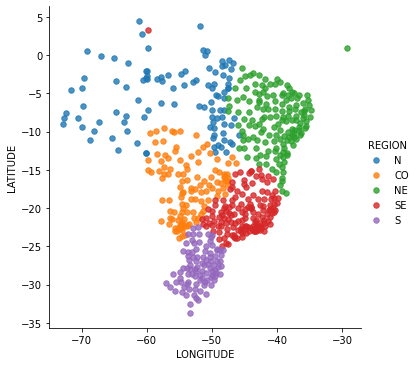

In [30]:
# graph without southern outlier
sns.lmplot(x="LONGITUDE", y="LATITUDE", data=data1,
           fit_reg=False, scatter_kws={"s": 30}, hue='REGION');

### Removing the eastern outlier

We will check the row which has longitude value more than -30.

In [31]:
data1[data1.LONGITUDE>-30]

,REGION,UF,STATION NAME,STATION CODE,LATITUDE,LONGITUDE,ALTITUDE
49,NE,RN,ARQ.SAO PEDRO E SAO PAULO,A302,0.9,-29.316667,15.0


As we got to know that the index=49 has the longitude value which is more than -30.So we will drop the 50th row from dataset(data1).

#### Identification of the outlier point:
https://en.wikipedia.org/wiki/Saint_Peter_and_Saint_Paul_Archipelago

We can know more about the station  **(ARQ.SAO PEDRO E SAO PAULO)** from the above link.

In [32]:
data1.drop(index=49,inplace=True)

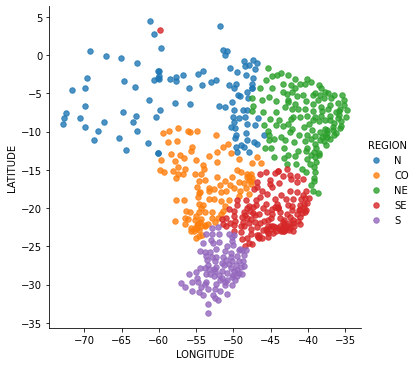

In [33]:
# Plotting the graph without eastern outlier
sns.lmplot(x="LONGITUDE", y="LATITUDE", data=data1,
           fit_reg=False, scatter_kws={"s": 30}, hue='REGION');

### _**Abstract of above analysis**_
- The southern outlier look like an archipelago in Atlatic. It is geographycally isolated from the rest of Brazil. Most probably it has its oun microclimate.
- This station should be excluded.
- On the filtered map, stations belonging to the same region cluster well. However, there is red dot in the north inside a blue cluster. According to the dataset this station belongs to the SE region but it is in the north. There can be misprints in data.

The **next task**: to deal with the "red" outlier. 

### Correcting misprints for a station

In [34]:
# Checking the latitude values which is more than 0.
data1[data1.LATITUDE>0].sort_values('LATITUDE', ascending=False)

,REGION,UF,STATION NAME,STATION CODE,LATITUDE,LONGITUDE,ALTITUDE
507,N,RR,PACARAIMA,S114,4.477500,-61.149167,0.0
361,N,AP,OIAPOQUE,A242,3.813611,-51.862500,21.0
518,SE,MG,EB_PEF_BONFIM,S122,3.358889,-59.823889,0.0
442,N,RR,BOA VISTA,A135,2.816944,-60.690833,94.0
506,N,RR,BALIZA,S113,0.947778,-59.746389,0.0
605,N,AP,PORTO GRANDE,A244,0.694444,-51.404167,84.0
494,N,AM,PEF YAUARETE,S115,0.599444,-69.191944,0.0
543,N,AP,ITAUBAL,A251,0.567778,-50.823611,21.0
472,N,AP,MACAPA,A249,0.035278,-51.088611,27.0


From above values we can see that the index=518 which contains REGION=SE,which is different from other rows which have REGION=N.

In [35]:
data1[(data1.UF=='MG') & (data1.LATITUDE>0)]

,REGION,UF,STATION NAME,STATION CODE,LATITUDE,LONGITUDE,ALTITUDE
518,SE,MG,EB_PEF_BONFIM,S122,3.358889,-59.823889,0.0


#### Identification for a station with misprints
https://www.google.se/maps/place/3%C2%B021'32.0%22N+59%C2%B049'26.0%22W/

So we know that the STATION **(EB_PEF_BONFIM)** which has index=518, REGION=SE AND UF=MG , is misprinted.So we will change it as "N" AND "RR" respectively.It is well mentioned in the above link.

In [36]:
data1.loc[data1['STATION CODE']=='S122', 'REGION'] = 'N'
data1.loc[data1['STATION CODE']=='S122', 'UF'] = 'RR'

In [37]:
# Checking the value of index=518
data1[data1.LATITUDE>0]

,REGION,UF,STATION NAME,STATION CODE,LATITUDE,LONGITUDE,ALTITUDE
361,N,AP,OIAPOQUE,A242,3.813611,-51.862500,21.0
442,N,RR,BOA VISTA,A135,2.816944,-60.690833,94.0
472,N,AP,MACAPA,A249,0.035278,-51.088611,27.0
494,N,AM,PEF YAUARETE,S115,0.599444,-69.191944,0.0
506,N,RR,BALIZA,S113,0.947778,-59.746389,0.0
507,N,RR,PACARAIMA,S114,4.477500,-61.149167,0.0
518,N,RR,EB_PEF_BONFIM,S122,3.358889,-59.823889,0.0
543,N,AP,ITAUBAL,A251,0.567778,-50.823611,21.0
605,N,AP,PORTO GRANDE,A244,0.694444,-51.404167,84.0


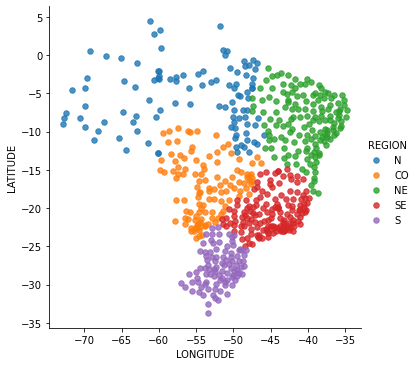

In [38]:
# The graph without outlier and misprinted value
sns.lmplot(x="LONGITUDE", y="LATITUDE", data=data1,
           fit_reg=False, scatter_kws={"s": 30}, hue='REGION');

The **next task**: to visualize the station locations according to the state (UF).

## Location of unique stations by state (UF)

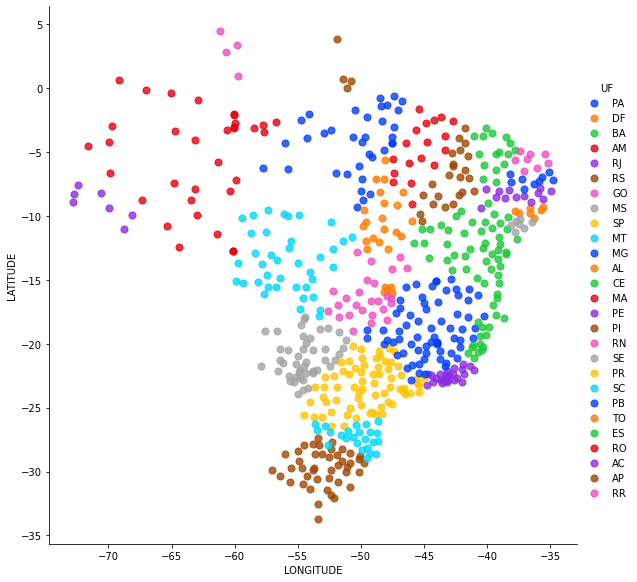

In [39]:
sns.lmplot(x="LONGITUDE", y="LATITUDE", data=data1,
           fit_reg=False, scatter_kws={"s": 50}, hue='UF',
           palette='bright',
           height=8, aspect=1,
          );

### _**Abstract of above analysis**_
- Stations from the same states cluster well.
- There can be some misprints for stations on border between states. However, they must not substantially change the conclusions about climate.

The **next task**: to visualize the station locations according to the altitude.

### Location of unique stations by ALTITUDE

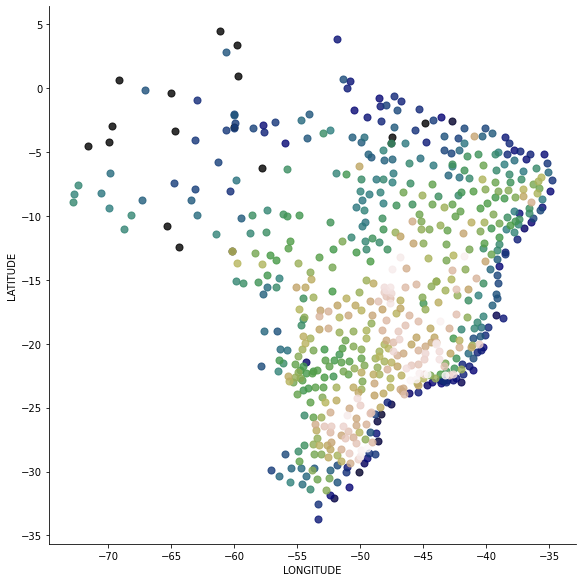

In [40]:
sns.lmplot(x="LONGITUDE", y="LATITUDE", data=data1,
           fit_reg=False, scatter_kws={"s": 50}, hue='ALTITUDE',
           palette='gist_earth',
           height=8, aspect=1,
           legend=False
          );

### _**Abstract from above analysis**_
- The data are in general consistent.
- The whole country can be roughly divided into 2 halves: northernlowlands and southern highlands.

In [41]:
# convert the panda dataframe to dask dataframe
data1=dd.from_pandas(data1,npartitions=1)

In [42]:
data1.compute()

,REGION,UF,STATION NAME,STATION CODE,LATITUDE,LONGITUDE,ALTITUDE
0,N,PA,SANTA MARIA DAS BARREIRAS,A256,-8.729722,-49.856389,165.00
2,CO,DF,BRASILIA,A001,-15.789444,-47.925833,1159.54
3,NE,BA,SALVADOR,A401,-13.016667,-38.516667,51.41
4,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
5,SE,RJ,ECOLOGIA AGRICOLA,A601,-22.800000,-43.683333,33.00
...,...,...,...,...,...,...,...
607,SE,SP,SAO SIMAO,A770,-21.461111,-47.579444,620.00
608,S,PR,GOIOERE,A825,-24.158333,-53.030556,452.34
609,S,RS,CAPAO DO LEAO (PELOTAS),A887,-31.802500,-52.407222,13.00
610,S,SC,CHAPECO,A895,-27.955278,-52.635556,680.00


## Loading the 2nd file

In [43]:
# loading the second csv file
data2=dd.read_csv(r'C:\Users\sushr\Downloads\Brazil_Weather\automatic_weather_stations_inmet_brazil_2000_2021.csv',sep=";",parse_dates=[1])

In [44]:
data2

,ESTACAO,DATA (YYYY-MM-DD),HORA (UTC),PRECIPITACAO TOTAL HORARIO (mm),"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (W/m2),"TEMPERATURA DO AR - BULBO SECO, HORARIA (C)",TEMPERATURA DO PONTO DE ORVALHO (C),TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C),TEMPERATURA MINIMA NA HORA ANT. (AUT) (C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIRECAO HORARIA (gr)","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
npartitions=104,,,,,,,,,,,,,,,,,,,,
,object,datetime64[ns],int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### Reformatting and Re-ordering

In [45]:
data2.columns=["STATION CODE","DATE (YYYY-MM-DD)","HOUR (UTC)","ACCUMULATED PRECIPITATION HOURLY (mm)",
               "ATMOSPHERIC PRESSURE AT THE STATION LEVEL (mB)","MAXIMA ATMOSPHERIC PRESSURE (mB)",
               "MINIMUM ATMOSPHERIC PRESSURE (mB)","GLOBAL RADIATION (Kj/m²)","AIR TEMPERATURE - DRY BULB (°C)"
               ,"DEW POINT TEMPERATURE (°C)","MAXIMUM TEMPERATURE (°C)","MINIMUM TEMPERATURE (°C)",
                 "MAXIMUM DEW POINT TEMPERATURE (°C)","MINIMUM DEW POINT TEMPERATURE (° C)",
               "MAXIMUM RELATIVE HUMIDITY (%)","MINIMUM RELATIVE HUMIDITY (%)","RELATIVE HUMIDITY (%)",
                 "WIND DIRECTION (°gr)","WIND GUST (m/s)","WIND SPEED (m/s)"]

In [46]:
data2

,STATION CODE,DATE (YYYY-MM-DD),HOUR (UTC),ACCUMULATED PRECIPITATION HOURLY (mm),ATMOSPHERIC PRESSURE AT THE STATION LEVEL (mB),MAXIMA ATMOSPHERIC PRESSURE (mB),MINIMUM ATMOSPHERIC PRESSURE (mB),GLOBAL RADIATION (Kj/m²),AIR TEMPERATURE - DRY BULB (°C),DEW POINT TEMPERATURE (°C),MAXIMUM TEMPERATURE (°C),MINIMUM TEMPERATURE (°C),MAXIMUM DEW POINT TEMPERATURE (°C),MINIMUM DEW POINT TEMPERATURE (° C),MAXIMUM RELATIVE HUMIDITY (%),MINIMUM RELATIVE HUMIDITY (%),RELATIVE HUMIDITY (%),WIND DIRECTION (°gr),WIND GUST (m/s),WIND SPEED (m/s)
npartitions=104,,,,,,,,,,,,,,,,,,,,
,object,datetime64[ns],int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## File merging

In [47]:
data=data1.merge(data2,on="STATION CODE",how="right")

In [48]:
data

,REGION,UF,STATION NAME,STATION CODE,LATITUDE,LONGITUDE,ALTITUDE,DATE (YYYY-MM-DD),HOUR (UTC),ACCUMULATED PRECIPITATION HOURLY (mm),ATMOSPHERIC PRESSURE AT THE STATION LEVEL (mB),MAXIMA ATMOSPHERIC PRESSURE (mB),MINIMUM ATMOSPHERIC PRESSURE (mB),GLOBAL RADIATION (Kj/m²),AIR TEMPERATURE - DRY BULB (°C),DEW POINT TEMPERATURE (°C),MAXIMUM TEMPERATURE (°C),MINIMUM TEMPERATURE (°C),MAXIMUM DEW POINT TEMPERATURE (°C),MINIMUM DEW POINT TEMPERATURE (° C),MAXIMUM RELATIVE HUMIDITY (%),MINIMUM RELATIVE HUMIDITY (%),RELATIVE HUMIDITY (%),WIND DIRECTION (°gr),WIND GUST (m/s),WIND SPEED (m/s)
npartitions=104,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,float64,float64,float64,datetime64[ns],int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


The dask dataframe(data2) has now changed column names.

In [49]:
# Checking the datatype of column "DATA (YYYY-MM-DD)"
data["DATE (YYYY-MM-DD)"].dtype

dtype('<M8[ns]')

We can see from above that the column "DATA (YYYY-MM-DD)" has right format.

### Reducing the analyzed time period

In [50]:
# making a new dataframe which will have data from 2019 onwards
new_data=data[data['DATE (YYYY-MM-DD)'].dt.year>2018]

### Overview

In [51]:
new_data.compute().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730208 entries, 0 to 431978
Data columns (total 26 columns):
 #   Column                                          Dtype         
---  ------                                          -----         
 0   REGION                                          object        
 1   UF                                              object        
 2   STATION NAME                                    object        
 3   STATION CODE                                    object        
 4   LATITUDE                                        float64       
 5   LONGITUDE                                       float64       
 6   ALTITUDE                                        float64       
 7   DATE (YYYY-MM-DD)                               datetime64[ns]
 8   HOUR (UTC)                                      int64         
 9   ACCUMULATED PRECIPITATION HOURLY (mm)           float64       
 10  ATMOSPHERIC PRESSURE AT THE STATION LEVEL (mB)  float64       
 11

In [52]:
n_row = new_data.shape[0]
n_col = new_data.shape[1]
print(f'There are total {n_row.compute()} rows and {n_col} columns in the dataset')

There are total 10730208 rows and 26 columns in the dataset


## Drop duplicated row and column

In [53]:
new_data.drop_duplicates(inplace=True)
n_row = new_data.shape[0]
n_col = new_data.shape[1]
print(f'There are total {n_row.compute()} rows and {n_col} columns in the dataset after removing duplicates')

,REGION,UF,STATION NAME,STATION CODE,LATITUDE,LONGITUDE,ALTITUDE,DATE (YYYY-MM-DD),HOUR (UTC),ACCUMULATED PRECIPITATION HOURLY (mm),ATMOSPHERIC PRESSURE AT THE STATION LEVEL (mB),MAXIMA ATMOSPHERIC PRESSURE (mB),MINIMUM ATMOSPHERIC PRESSURE (mB),GLOBAL RADIATION (Kj/m²),AIR TEMPERATURE - DRY BULB (°C),DEW POINT TEMPERATURE (°C),MAXIMUM TEMPERATURE (°C),MINIMUM TEMPERATURE (°C),MAXIMUM DEW POINT TEMPERATURE (°C),MINIMUM DEW POINT TEMPERATURE (° C),MAXIMUM RELATIVE HUMIDITY (%),MINIMUM RELATIVE HUMIDITY (%),RELATIVE HUMIDITY (%),WIND DIRECTION (°gr),WIND GUST (m/s),WIND SPEED (m/s)
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,float64,float64,float64,datetime64[ns],int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


There are total 10730208 rows and 26 columns in the dataset after removing duplicates


#### <font color="green">Here we can see that there are no duplicated rows in the dataset.</font>

## Handle missing values
From above we saw that in this dataset, we have many cases of missing values.
So we are using **Missingno** library to find out missing values in the dataset.

<AxesSubplot:>

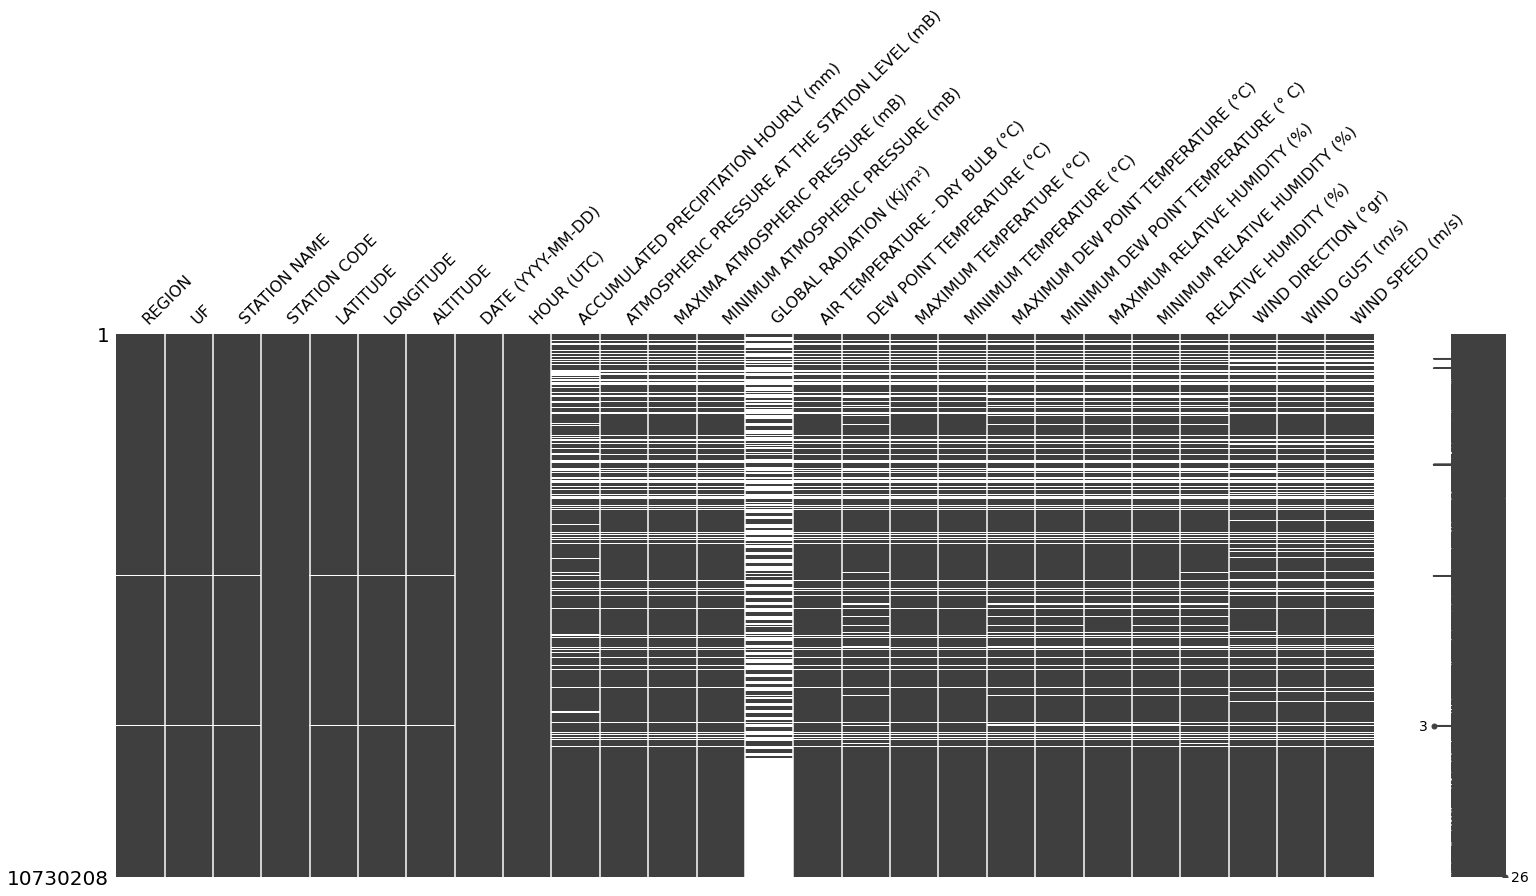

In [54]:
msno.matrix(new_data.compute())

We can see from above plotting ,there are many columns which contain missing values So in the next step we will remove all column and rows which contain missing values.

In [55]:
# Checking the number of missing values in each column
new_data.isna().sum().compute()

REGION                                              27816
UF                                                  27816
STATION NAME                                        27816
STATION CODE                                            0
LATITUDE                                            27816
LONGITUDE                                           27816
ALTITUDE                                            27816
DATE (YYYY-MM-DD)                                       0
HOUR (UTC)                                              0
ACCUMULATED PRECIPITATION HOURLY (mm)             2393173
ATMOSPHERIC PRESSURE AT THE STATION LEVEL (mB)    1845967
MAXIMA ATMOSPHERIC PRESSURE (mB)                  1854721
MINIMUM ATMOSPHERIC PRESSURE (mB)                 1854594
GLOBAL RADIATION (Kj/m²)                          5609970
AIR TEMPERATURE - DRY BULB (°C)                   1836574
DEW POINT TEMPERATURE (°C)                        2162312
MAXIMUM TEMPERATURE (°C)                          1845309
MINIMUM TEMPER

In [56]:
# Dropping the missing values
new_data=new_data.dropna()

<AxesSubplot:>

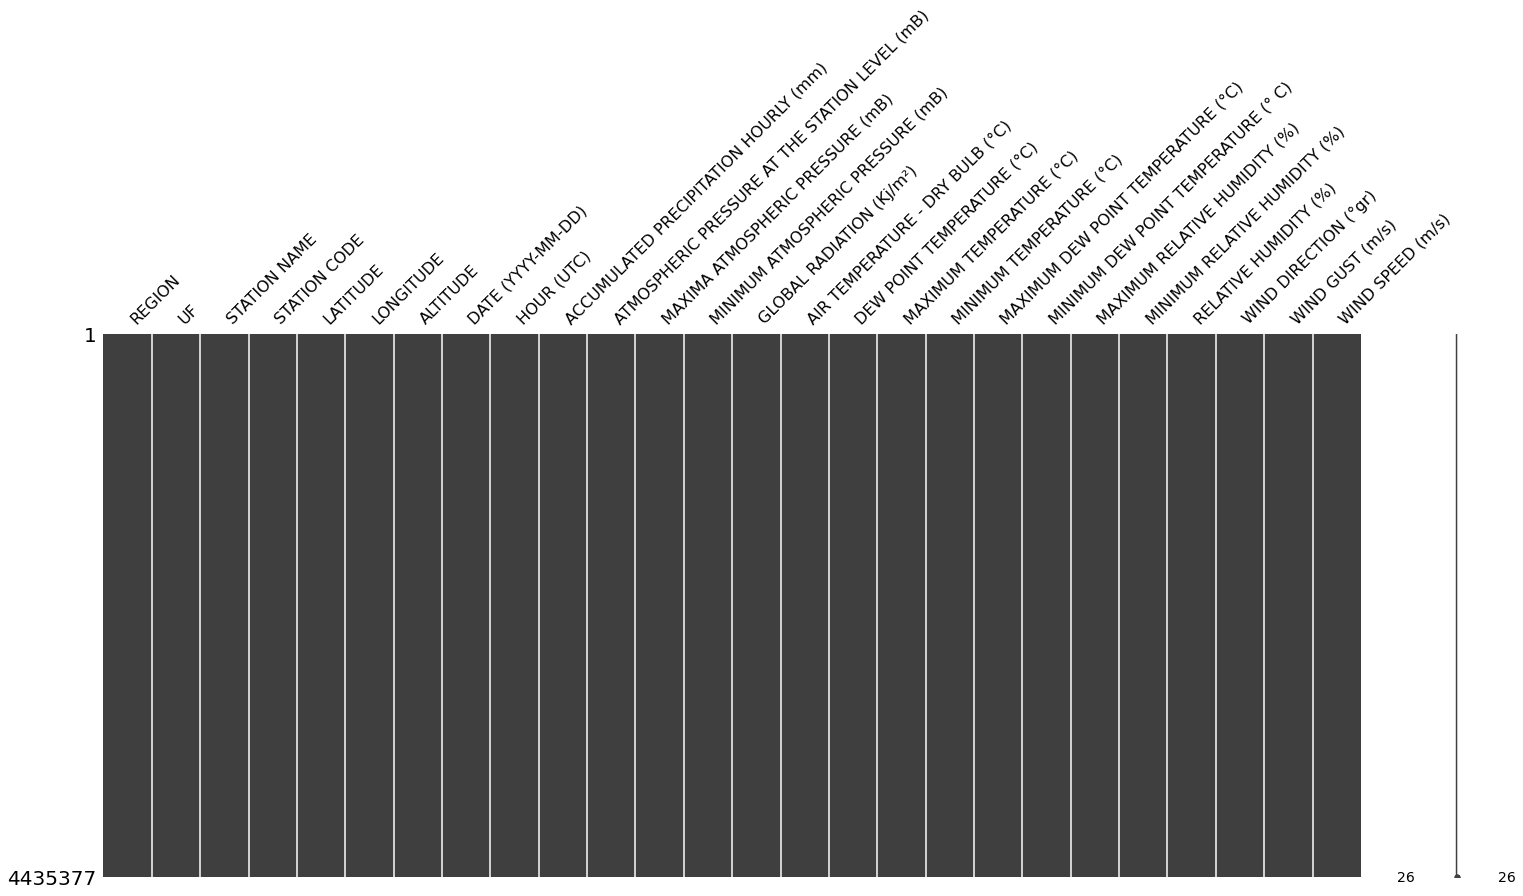

In [57]:
msno.matrix(new_data.compute())

From above plotting,we can see there is no more missing values in the dataframe.

### Combine time and date

#### We will then combine the "Date" and "Hour" column as timestamp format.

In [58]:
date = new_data["DATE (YYYY-MM-DD)"]
hours = new_data["HOUR (UTC)"] // 100
# hours_timedelta = pd.to_timedelta(hours, unit='h')
hours_timedelta = hours.map_partitions(pd.to_timedelta, unit='h')

minutes = new_data["HOUR (UTC)"] % 100
# minutes_timedelta = pd.to_timedelta(minutes, unit='m')
minutes_timedelta = minutes.map_partitions(pd.to_timedelta, unit='m')

new_data["DATE_TIME"] = date+ hours_timedelta + minutes_timedelta

In [59]:
new_data.head()

,REGION,UF,STATION NAME,STATION CODE,LATITUDE,LONGITUDE,ALTITUDE,DATE (YYYY-MM-DD),HOUR (UTC),ACCUMULATED PRECIPITATION HOURLY (mm),ATMOSPHERIC PRESSURE AT THE STATION LEVEL (mB),MAXIMA ATMOSPHERIC PRESSURE (mB),MINIMUM ATMOSPHERIC PRESSURE (mB),GLOBAL RADIATION (Kj/m²),AIR TEMPERATURE - DRY BULB (°C),DEW POINT TEMPERATURE (°C),MAXIMUM TEMPERATURE (°C),MINIMUM TEMPERATURE (°C),MAXIMUM DEW POINT TEMPERATURE (°C),MINIMUM DEW POINT TEMPERATURE (° C),MAXIMUM RELATIVE HUMIDITY (%),MINIMUM RELATIVE HUMIDITY (%),RELATIVE HUMIDITY (%),WIND DIRECTION (°gr),WIND GUST (m/s),WIND SPEED (m/s),DATE_TIME
10,CO,DF,BRASILIA,A001,-15.789444,-47.925833,1159.54,2021-01-01,1000,0.0,887.9,887.9,887.3,298.2,20.2,17.1,20.2,18.0,17.4,16.1,89.0,82.0,83.0,356.0,2.3,0.8,2021-01-01 10:00:00
11,CO,DF,BRASILIA,A001,-15.789444,-47.925833,1159.54,2021-01-01,1100,0.0,888.2,888.2,887.8,1203.7,23.2,17.2,23.4,20.2,17.7,16.7,83.0,67.0,69.0,166.0,4.3,2.3,2021-01-01 11:00:00
12,CO,DF,BRASILIA,A001,-15.789444,-47.925833,1159.54,2021-01-01,1200,0.0,888.6,888.6,888.2,1664.9,24.9,18.0,24.9,23.1,18.7,17.0,71.0,65.0,65.0,164.0,5.0,2.7,2021-01-01 12:00:00
13,CO,DF,BRASILIA,A001,-15.789444,-47.925833,1159.54,2021-01-01,1300,0.0,888.7,888.7,888.6,2851.7,25.9,15.3,26.3,24.4,18.4,15.3,67.0,50.0,52.0,150.0,6.3,2.2,2021-01-01 13:00:00
14,CO,DF,BRASILIA,A001,-15.789444,-47.925833,1159.54,2021-01-01,1400,0.0,888.5,888.7,888.4,3115.7,27.0,15.9,27.0,25.1,17.5,15.5,62.0,50.0,50.0,114.0,5.7,3.2,2021-01-01 14:00:00


### Then we will set the index as Date_Time

In [60]:
new_data=new_data.set_index("DATE_TIME")

In [61]:
new_data.head(3)

,REGION,UF,STATION NAME,STATION CODE,LATITUDE,LONGITUDE,ALTITUDE,DATE (YYYY-MM-DD),HOUR (UTC),ACCUMULATED PRECIPITATION HOURLY (mm),ATMOSPHERIC PRESSURE AT THE STATION LEVEL (mB),MAXIMA ATMOSPHERIC PRESSURE (mB),MINIMUM ATMOSPHERIC PRESSURE (mB),GLOBAL RADIATION (Kj/m²),AIR TEMPERATURE - DRY BULB (°C),DEW POINT TEMPERATURE (°C),MAXIMUM TEMPERATURE (°C),MINIMUM TEMPERATURE (°C),MAXIMUM DEW POINT TEMPERATURE (°C),MINIMUM DEW POINT TEMPERATURE (° C),MAXIMUM RELATIVE HUMIDITY (%),MINIMUM RELATIVE HUMIDITY (%),RELATIVE HUMIDITY (%),WIND DIRECTION (°gr),WIND GUST (m/s),WIND SPEED (m/s)
DATE_TIME,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,N,AC,CRUZEIRO DO SUL,A108,-7.610556,-72.405000,220.0,2019-01-01,0,0.0,985.3,985.3,984.5,0.6,25.4,22.6,27.3,25.4,22.9,22.3,85.0,74.0,85.0,236.0,2.6,0.0
2019-01-01,CO,GO,MONTE ALEGRE DE GOIAS,A032,-13.248056,-46.889722,1253.0,2019-01-01,0,1.2,952.5,952.5,951.1,0.0,20.9,19.8,22.9,20.7,19.8,18.4,93.0,76.0,93.0,13.0,7.3,0.7
2019-01-01,NE,MA,TURIACU,A219,-1.661667,-45.372778,41.0,2019-01-01,0,0.0,1007.0,1007.0,1006.4,3065.3,26.5,22.8,26.7,26.5,22.8,21.9,80.0,75.0,80.0,34.0,6.2,1.8


In [62]:
new_data.index.dtype

dtype('<M8[ns]')

#### There is one column with so few datapoints that they seem useless. It's better to remove the column.For several parameters (temperature, pressure, humidity) there are 3 columns (average, hourly maximum, and hourly minimum). The redundant (maximum and minimum) columns can be removed.Apart from that the columns (Date and Hour) is also need to be dropped.
**The next task: to drop the useless columns.**

## Drop the useless columns

In [63]:
new_data.columns

Index(['REGION', 'UF', 'STATION NAME', 'STATION CODE', 'LATITUDE', 'LONGITUDE',
       'ALTITUDE', 'DATE (YYYY-MM-DD)', 'HOUR (UTC)',
       'ACCUMULATED PRECIPITATION HOURLY (mm)',
       'ATMOSPHERIC PRESSURE AT THE STATION LEVEL (mB)',
       'MAXIMA ATMOSPHERIC PRESSURE (mB)', 'MINIMUM ATMOSPHERIC PRESSURE (mB)',
       'GLOBAL RADIATION (Kj/m²)', 'AIR TEMPERATURE - DRY BULB (°C)',
       'DEW POINT TEMPERATURE (°C)', 'MAXIMUM TEMPERATURE (°C)',
       'MINIMUM TEMPERATURE (°C)', 'MAXIMUM DEW POINT TEMPERATURE (°C)',
       'MINIMUM DEW POINT TEMPERATURE (° C)', 'MAXIMUM RELATIVE HUMIDITY (%)',
       'MINIMUM RELATIVE HUMIDITY (%)', 'RELATIVE HUMIDITY (%)',
       'WIND DIRECTION (°gr)', 'WIND GUST (m/s)', 'WIND SPEED (m/s)'],
      dtype='object')

In [64]:
new_data=new_data.drop(columns=["DATE (YYYY-MM-DD)","HOUR (UTC)","MAXIMA ATMOSPHERIC PRESSURE (mB)","MINIMUM ATMOSPHERIC PRESSURE (mB)",
                               "GLOBAL RADIATION (Kj/m²)","MAXIMUM TEMPERATURE (°C)","MINIMUM TEMPERATURE (°C)","MAXIMUM DEW POINT TEMPERATURE (°C)"
                               ,"MINIMUM DEW POINT TEMPERATURE (° C)","MAXIMUM RELATIVE HUMIDITY (%)","MINIMUM RELATIVE HUMIDITY (%)"])

In [65]:
# number of rows
new_data.shape[0].compute()

4435377

#### Now we have a cleaned dataset which is named as **"new_data"**.

## **<font color="Green">Descriptive analysis to remove the outliers</font>**

#### An outlier
An outlier is an unusually large or small observation. Outliers can have a disproportionate effect on statistical results, such as the mean, which can result in misleading interpretations.

Our **next task** is to remove outliers if it present in the dataset.So in this stage we are going to do descriptive statistical analysis by taking a column(WIND SPEED (m/s)) into consideration and for this step we are going to use z-score method.

### Time Series Scatter Plot for wind-speed

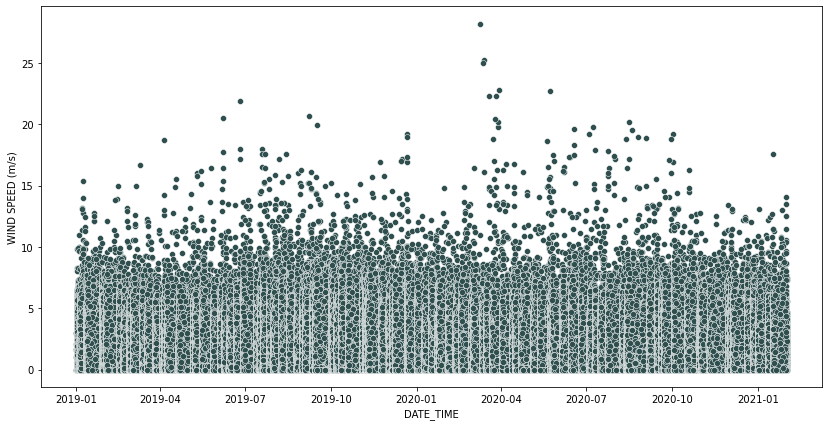

In [66]:
lag=new_data.sample(frac=0.1).compute()
lag=pd.DataFrame(data=lag)
plt.figure(figsize=(14,7))
sns.scatterplot(x=lag.index,y=lag["WIND SPEED (m/s)"],color="darkslategrey");

From above scatter-plot we can see that there are many outliers present in the column("WIND SPEED (m/s)").

###  Z-Score:
We are using Z-Score to remove our outliers from the data sets. we are keeping Z score which are less or equal to 3. Below is the formula for Z-score

$$z=\frac{x-\mu}{\sigma}$$
$Z$ = standard score
$x$ = observed value
$\mu$ = mean of the sample
$\sigma$ = standard deviation of the sample

In [67]:
new_data.describe().compute()

,LATITUDE,LONGITUDE,ALTITUDE,ACCUMULATED PRECIPITATION HOURLY (mm),ATMOSPHERIC PRESSURE AT THE STATION LEVEL (mB),AIR TEMPERATURE - DRY BULB (°C),DEW POINT TEMPERATURE (°C),RELATIVE HUMIDITY (%),WIND DIRECTION (°gr),WIND GUST (m/s),WIND SPEED (m/s)
count,4.435377e+06,4.435377e+06,4.435377e+06,4.435377e+06,4.435377e+06,4.435377e+06,4.435377e+06,4.435377e+06,4.435377e+06,4.435377e+06,4.435377e+06
mean,-1.651388e+01,-4.795283e+01,4.394309e+02,1.757228e-01,9.646549e+02,2.566977e+01,1.739422e+01,6.446885e+01,1.574289e+02,5.440187e+00,2.189626e+00
std,8.009903e+00,6.697644e+00,3.443191e+02,1.472739e+00,3.708702e+01,5.381395e+00,4.929783e+00,2.105255e+01,1.006312e+02,3.019951e+00,1.676700e+00
min,-3.374167e+01,-7.274778e+01,1.000000e-01,0.000000e+00,8.089000e+02,-5.900000e+00,-2.750000e+01,7.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,-2.177972e+01,-5.172083e+01,1.790000e+02,0.000000e+00,9.477000e+02,2.390000e+01,1.670000e+01,5.700000e+01,1.090000e+02,4.200000e+00,1.400000e+00
50%,-1.486111e+01,-4.586958e+01,4.320000e+02,0.000000e+00,9.875000e+02,2.760000e+01,1.970000e+01,7.300000e+01,1.880000e+02,6.200000e+00,2.500000e+00
75%,-6.555000e+00,-3.826111e+01,7.560000e+02,2.000000e-01,1.005550e+03,3.290000e+01,2.270000e+01,9.500000e+01,2.920000e+02,8.800000e+00,4.000000e+00
max,3.813611e+00,-3.481528e+01,1.810000e+03,9.600000e+01,1.050000e+03,4.420000e+01,3.500000e+01,1.000000e+02,3.600000e+02,5.000000e+01,2.910000e+01


In [68]:
# z=Z-score
from scipy import stats
z = np.abs(stats.zscore(new_data['WIND SPEED (m/s)']))
print(z)

[1.30591465 0.88842776 0.23237693 ... 0.76914579 0.64986382 0.00618701]


If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

In [69]:
x =np.where(z<=3)
for i in x:
    print(len(i))

4394838


**From above we know that the new dataset which will be without outliers should have 4395927 number of rows.**

In [70]:
# calculating Z-Score values for column "WIND SPEED (m/s)"  and making a new column "z_score" which will hold all z-score values
new_data['z_score']= (new_data["WIND SPEED (m/s)"] - new_data["WIND SPEED (m/s)"].mean()) / new_data["WIND SPEED (m/s)"].std()

In [71]:
new_data.head()

,REGION,UF,STATION NAME,STATION CODE,LATITUDE,LONGITUDE,ALTITUDE,ACCUMULATED PRECIPITATION HOURLY (mm),ATMOSPHERIC PRESSURE AT THE STATION LEVEL (mB),AIR TEMPERATURE - DRY BULB (°C),DEW POINT TEMPERATURE (°C),RELATIVE HUMIDITY (%),WIND DIRECTION (°gr),WIND GUST (m/s),WIND SPEED (m/s),z_score
DATE_TIME,,,,,,,,,,,,,,,,
2019-01-01,N,AC,CRUZEIRO DO SUL,A108,-7.610556,-72.405000,220.0,0.0,985.3,25.4,22.6,85.0,236.0,2.6,0.0,-1.305914
2019-01-01,CO,GO,MONTE ALEGRE DE GOIAS,A032,-13.248056,-46.889722,1253.0,1.2,952.5,20.9,19.8,93.0,13.0,7.3,0.7,-0.888428
2019-01-01,NE,MA,TURIACU,A219,-1.661667,-45.372778,41.0,0.0,1007.0,26.5,22.8,80.0,34.0,6.2,1.8,-0.232377
2019-01-01,CO,GO,LUZIANIA,A012,-16.272222,-47.966389,959.5,0.0,903.6,20.3,18.6,90.0,23.0,6.5,2.5,0.185110
2019-01-01,N,RO,PORTO VELHO,A925,-8.763889,-63.475000,98.0,0.0,999.7,26.2,23.3,84.0,219.0,3.8,0.7,-0.888428


From above we can see there is a big difference between maximum and minimum z-score values.

In [72]:
# Trying to find out outliers by comparing the two columns "WIND SPEED (m/s)" and "z_score"
new_data[["WIND SPEED (m/s)","z_score"]].describe().round(3).compute()

,WIND SPEED (m/s),z_score
count,4435377.000,4435377.000
mean,2.190,0.000
std,1.677,1.000
min,0.000,-1.306
25%,1.400,-0.471
50%,2.500,0.185
75%,4.000,1.080
max,29.100,16.050


The scaled results show a mean of 0.000 and a standard deviation of 1.000, indicating that the transformed values fit the z-scale model. The max value of 16.050 is further proof of the presence of outliers, as it falls well above the z-score limit of +3.

In [73]:
# creating a new dataframe which will be outlier free
df_new = new_data[(new_data.z_score>-3) & (new_data.z_score<3)]

In [74]:
# Now we have a dataframe which is outlier free and checking it's row size
df_new.shape[0].compute()

4394838

In [75]:
df_new.compute().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4394838 entries, 2019-01-01 00:00:00 to 2021-01-31 23:00:00
Data columns (total 16 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   REGION                                          object 
 1   UF                                              object 
 2   STATION NAME                                    object 
 3   STATION CODE                                    object 
 4   LATITUDE                                        float64
 5   LONGITUDE                                       float64
 6   ALTITUDE                                        float64
 7   ACCUMULATED PRECIPITATION HOURLY (mm)           float64
 8   ATMOSPHERIC PRESSURE AT THE STATION LEVEL (mB)  float64
 9   AIR TEMPERATURE - DRY BULB (°C)                 float64
 10  DEW POINT TEMPERATURE (°C)                      float64
 11  RELATIVE HUMIDITY (%)                           float64


#### Checking the column(WIND SPEED (m/s)) after removing outliers

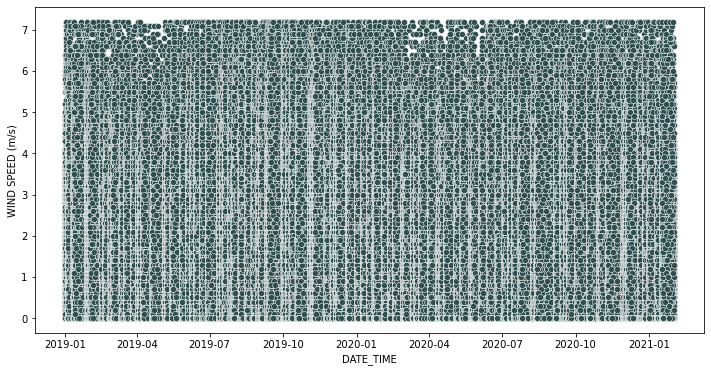

In [76]:
lag_new=df_new.sample(frac=0.1).compute()
lag_new=pd.DataFrame(data=lag_new)
plt.figure(figsize=(12,6))
sns.scatterplot(x=lag_new.index,y=lag_new["WIND SPEED (m/s)"],color="darkslategrey");

From above graph,we concluded that the dataframe (df_new) has column(WIND SPEED (m/s)), which is outlier free.

In [77]:
# Dropping the column "z_score"
df_new=df_new.drop(columns="z_score")

In [78]:
df_new

,REGION,UF,STATION NAME,STATION CODE,LATITUDE,LONGITUDE,ALTITUDE,ACCUMULATED PRECIPITATION HOURLY (mm),ATMOSPHERIC PRESSURE AT THE STATION LEVEL (mB),AIR TEMPERATURE - DRY BULB (°C),DEW POINT TEMPERATURE (°C),RELATIVE HUMIDITY (%),WIND DIRECTION (°gr),WIND GUST (m/s),WIND SPEED (m/s)
npartitions=104,,,,,,,,,,,,,,,
2019-01-01 00:00:00,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2019-01-04 00:00:00,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-17 09:00:00,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31 23:00:00,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


**Now we have a cleaned dataset "df_new" on which we will do further analysis and visualization.**

## Time Series Analysis

### Aggregate the data of whole dataframe to number of year and corresponding month and week

In [79]:
df_new.groupby([df_new.index.year,df_new.index.month,df_new.index.week]).sum().compute().style.highlight_max()

C:\Users\sushr\anaconda3\lib\site-packages\dask\dataframe\accessor.py:88: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.

C:\Users\sushr\anaconda3\lib\site-packages\dask\dataframe\accessor.py:43: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



From above we can easily mark out the highest value of each column which contains numeric values.

### Analysis of weather on  basis of Time and Date

### 1. Analysis of precipitation in Brazil on basis of date and time

In [80]:
#  Making a new panda dataframe "ne" which will contain 2 columns to know about precipitation amount and temperatute
new_group=df_new[["ACCUMULATED PRECIPITATION HOURLY (mm)","AIR TEMPERATURE - DRY BULB (°C)"]]
ne=pd.DataFrame(data=new_group.compute())
ne

,ACCUMULATED PRECIPITATION HOURLY (mm),AIR TEMPERATURE - DRY BULB (°C)
DATE_TIME,,
2019-01-01 00:00:00,0.0,25.4
2019-01-01 00:00:00,1.2,20.9
2019-01-01 00:00:00,0.0,26.5
2019-01-01 00:00:00,0.0,20.3
2019-01-01 00:00:00,0.0,26.2
...,...,...
2021-01-31 23:00:00,0.2,26.3
2021-01-31 23:00:00,0.0,23.3
2021-01-31 23:00:00,0.0,23.6


### Precipitation by year

In [123]:
l=ne.groupby(ne.index.year)[["ACCUMULATED PRECIPITATION HOURLY (mm)","AIR TEMPERATURE - DRY BULB (°C)"]].mean()
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=l.index,
        y=l["ACCUMULATED PRECIPITATION HOURLY (mm)"], name="Line", mode="lines+markers", marker=dict(color="black", size=10)
    ))
fig.add_trace(
    go.Bar(x=l.index,
               y=l["ACCUMULATED PRECIPITATION HOURLY (mm)"],name="Bar", marker={'color': 'pink'})
               )

fig.add_annotation(
    x=2021,
    y=0.216951,
    xref="x",
    yref="y",
    text="max=0.217 mm/hour & year=2021",
    showarrow=True,
    font=dict(
        family="Courier New,monospace",
        size=16,
        color="black"
    ),
    align="center",
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="#636363",
    ax=20,
    ay=-30,
    bordercolor="black",
    borderwidth=2,
    borderpad=4,
    bgcolor="lightblue",
    opacity=0.8
)

fig.update_xaxes(tickangle=0,
                 tickvals = l.index
)


fig.update_layout(
    title="Yearly Precipitation",
    xaxis_title="Year",
    yaxis_title="Precipitation(mm)/hour",
    legend_title="Graph type",
    font=dict(
        size=15,
        color="black"
    ))

fig.show();

From above figure we can see that the **<font color="red">year 2021</font>** has highest average precipitation.i.e.this year gets highest rain in compare to other year.

### Precipitation by  month

In [122]:
m=ne.groupby(ne.index.month)[["ACCUMULATED PRECIPITATION HOURLY (mm)","AIR TEMPERATURE - DRY BULB (°C)"]].mean()
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=m.index,
        y=m["ACCUMULATED PRECIPITATION HOURLY (mm)"], name="Line", mode="lines+markers", marker=dict(color="grey", size=10)
    ))

fig.add_annotation(
    x=2,
    y=0.3212767,
    xref="x",
    yref="y",
    text="max=0.32 mm/hour,month=February",
    showarrow=True,
    font=dict(
        family="Courier New,monospace",
        size=16,
        color="black"
    ),
    align="center",
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="black",
    ax=20,
    ay=-30,
    bordercolor="black",
    borderwidth=2,
    borderpad=4,
    bgcolor="yellow",
    opacity=0.8
)

fig = fig.update_xaxes(tickangle=45,
                 tickmode = 'array',
                 tickvals = ['0', '1', '2', '3', '4', '5', '6','7','8','9','10','11','12'],
                 ticktext= ['', 'January', 'February','March', 'April', 'May', 'June', 'July','August','September','October','November','December'])




fig.update_layout(
    title="Monthly Precipitation",
    xaxis_title="Month",
    yaxis_title="Precipitation",
    legend_title="Graph type",
    font=dict(
        size=15,
        color="black"
    ))

fig.show();

Here we can see from above that the month **<font color="orange">February</font>** has highest rain in Brazil.

### Precipitation by time

In [121]:
no=ne.groupby(ne.index.hour)[["ACCUMULATED PRECIPITATION HOURLY (mm)","AIR TEMPERATURE - DRY BULB (°C)"]].mean()
fig = go.Figure()

fig.add_trace(
    go.Bar(x=no.index,
               y=no["ACCUMULATED PRECIPITATION HOURLY (mm)"],name="Precipitation bar graph",marker={"color":"turquoise"}
               ))

fig.add_annotation(
    x=0,
    y=0.5597211,
    xref="x",
    yref="y",
    text="max=0.56 mm/hr,time=12:00 a.m",
    showarrow=True,
    font=dict(
        family="Courier New,monospace",
        size=16,
        color="white"
    ),
    align="center",
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="black",
    ax=20,
    ay=-30,
    bordercolor="white",
    borderwidth=2,
    borderpad=4,
    bgcolor="black",
    opacity=0.8
)



fig.update_layout(
    title="Hourly Precipitation",
    xaxis_title="Time in Hour(UTC)",
    yaxis_title="Precipitation(mm) hourly",
    legend_title="Graph type",
    font=dict(
        size=15,
        color="black"
    ))

fig.show();

From above we can see that at time 00:00(UTC) the amount of precipitation is high.It means at **<font color="blue">night 12:00 o'clock</font>** there is more rain in Brazil.

### 2. Analysis of Temperature on basis of Time series

###  Hottest year in Brazil

In [84]:
hot=new_group.groupby(new_group.index.year)[["ACCUMULATED PRECIPITATION HOURLY (mm)","AIR TEMPERATURE - DRY BULB (°C)"]].mean()
hot=pd.DataFrame(data=hot.compute())

In [85]:
fig = go.Figure()

colors = ['RosyBrown',] * 3
colors[2] = 'steelblue'

fig = go.Figure(data=[go.Bar(
    x=hot.index,
    y=hot["AIR TEMPERATURE - DRY BULB (°C)"],name="Bar",
    marker_color=colors # marker color can be a single color value or an iterable
)])


fig.add_trace(
    go.Scatter(
        x=hot.index,
        y=hot["AIR TEMPERATURE - DRY BULB (°C)"], name="Marker+Text", mode="markers+text", marker=dict(color="black", size=5)
        ,text=hot["AIR TEMPERATURE - DRY BULB (°C)"].round(2)
    ))



fig.update_xaxes(tickangle=0,
                 tickvals = hot.index
)


fig.update_layout(
    title="Yearly Temperature",
    xaxis_title="Year",
    yaxis_title="Air temperature(°C)",
    legend_title="Graph type",
    font=dict(
        size=15,
        color="black"
    ))

fig.show();

From above we can see that almost every year has same temperature but on year 2021, the atmospheric temperature is little high.It means at **<font color="blue">2021</font>** is the hottest year of Brazil.

### Hottest month of Brazil

In [86]:
m=ne.groupby(ne.index.month)[["ACCUMULATED PRECIPITATION HOURLY (mm)","AIR TEMPERATURE - DRY BULB (°C)"]].mean()
colors = ['steelblue',] * 12
colors[0] = 'Olivedrab'

fig = go.Figure(data=[go.Bar(name="Highest value",
    x=m.index,
    y=m["AIR TEMPERATURE - DRY BULB (°C)"],
    marker_color=colors # marker color can be a single color value or an iterable
)])



fig.add_trace(
    go.Scatter(
        x=m.index,
        y=m["AIR TEMPERATURE - DRY BULB (°C)"],name="all values",mode="lines+markers+text",
                            text=m["AIR TEMPERATURE - DRY BULB (°C)"].nlargest(1).round(2),textposition="top center",textfont=dict(size=15),marker=dict(color="grey",size=8)
    ))



fig = fig.update_xaxes(tickangle=45,
                 tickmode = 'array',
                 tickvals = ['0', '1', '2', '3', '4', '5', '6','7','8','9','10','11','12'],
                 ticktext= ['', 'January', 'February','March', 'April', 'May', 'June', 'July','August','September','October','November','December'])


fig.update_layout(
    title="Monthly Temperature",
    xaxis_title="Month",
    yaxis_title="Temperature(°C)",
    legend_title="Temperature",
    font=dict(
        size=15,
        color="black"
    ))

fig.show();

From above figure we knew that the month **<font color="green">January</font>** is the  hottest among other months of the year in Brazil.

### 3. Analysis of wind on basis of Time series

• Wind speed refers to the instantaneous speed of the wind. A wind gust is a sudden burst of the wind speed.

• The wind speed is properly defined and can be measured, but a wind gust is a phenomenon that can only be described qualitatively.

In [87]:
wind=df_new.groupby([df_new.index])[["WIND DIRECTION (°gr)","WIND GUST (m/s)","WIND SPEED (m/s)"]].mean()
wind=pd.DataFrame(data=wind.compute())

### Year vs Wind 

Now we will do analysis of wind speed on yearly basis.

In [88]:
wind_year=wind.groupby(wind.index.year)[["WIND GUST (m/s)","WIND SPEED (m/s)"]].mean()
wind_year.style.highlight_max(color="plum")

,WIND GUST (m/s),WIND SPEED (m/s)
DATE_TIME,,
2019,4.582014,1.810354
2020,4.537842,1.786703
2021,4.702174,1.774600


From above  we can see that the year **2019** has highest wind speed value and the year **2021** has highest wind-gust value.

### Month vs Wind

In [89]:
wind_month=wind.groupby(wind.index.month)[["WIND GUST (m/s)","WIND SPEED (m/s)"]].mean()


fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=wind_month.index,
        y=wind_month["WIND GUST (m/s)"], name="Wind-Gust", mode="lines+markers", marker=dict(color="steelblue", size=10)
    ))


fig.add_trace(
    go.Scatter(
        x=wind_month.index,
        y=wind_month["WIND SPEED (m/s)"], name="Wind-Speed", mode="lines+markers", marker=dict(color="darkseagreen", size=10)
    ))

fig.add_annotation(
    x=10,
    y=5.20136,
    xref="x",
    yref="y",
    text="max=5.21 & month=October",
    showarrow=True,
    font=dict(
        family="Courier New,monospace",
        size=16,
        color="black"
    ),
    align="center",
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="black",
    ax=20,
    ay=-30,
    bordercolor="black",
    borderwidth=2,
    borderpad=4,
    bgcolor="pink",
    opacity=0.8
)

fig.add_annotation(
    x=9,
    y=2.079968,
    xref="x",
    yref="y",
    text="max=2.08 & month=September",
    showarrow=True,
    font=dict(
        family="Courier New,monospace",
        size=16,
        color="black"
    ),
    align="center",
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="black",
    ax=20,
    ay=-30,
    bordercolor="black",
    borderwidth=2,
    borderpad=4,
    bgcolor="lightblue",
    opacity=0.8
)

fig = fig.update_xaxes(tickangle=45,
                 tickmode = 'array',
                 tickvals = ['0', '1', '2', '3', '4', '5', '6','7','8','9','10','11','12'],
                 ticktext= ['', 'January', 'February','March', 'April', 'May', 'June', 'July'
                            ,'August','September','October','November','December'])




fig.update_layout(
    title="Wind-Gust and Wind-Speed by monthly",
    xaxis_title="Month-name",
    yaxis_title="Wind",
    legend_title="Wind-value",
    font=dict(
        size=15,
        color="black"
    ))

fig.show();

From above we can see that the month **<font color="steelblue">October</font>** has highest Wind-Gust value and the month **<font color="darkseagreen">September</font>** has highest Wind-Speed value.

### Hour Vs Wind

In [90]:
wind_hour=wind.groupby(wind.index.hour)[["WIND GUST (m/s)","WIND SPEED (m/s)"]].mean()

from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2,subplot_titles=("Time vs Wind-speed", "Time vs Wind-Gust"))

fig.add_trace(
    go.Scatter(x=wind_hour.index,
            y=wind_hour["WIND SPEED (m/s)"],mode="markers",name="Wind-Speed",marker=dict(color="darksalmon")),row=1,col=1)


fig.add_trace(
    go.Scatter(x=wind_hour.index,
               y=wind_hour["WIND GUST (m/s)"],mode="markers",name="Wind-Gust",marker=dict(color="darkseagreen")),
                row=1, col=2
)

# Update xaxis properties
fig.update_xaxes(title_text="Time (Hour in UTC)", row=1, col=1)
fig.update_xaxes(title_text="Time (Hour in UTC)", row=1, col=2)


# Update yaxis properties
fig.update_yaxes(title_text="wind-speed", row=1, col=1)
fig.update_yaxes(title_text="wind-gust", row=1, col=2)


fig.add_annotation(
    x=15,
    y=2.522563,
    xref="x",
    yref="y",
    text="max=2.52m/s & Time=3 o'clock",
    showarrow=True,
    font=dict(
        family="Courier New,monospace",
        size=16,
        color="white"
    ),
    align="center",
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="black",
    ax=20,
    ay=-30,
    bordercolor="black",
    borderwidth=2,
    borderpad=4,
    bgcolor="darksalmon",
    opacity=0.8,row=1,col=1
)

fig.add_annotation(
    x=17,
    y=6.480095,
    xref="x",
    yref="y",
    text="max=6.50m/s & Time=5 o'clock",
    showarrow=True,
    font=dict(
        family="Courier New,monospace",
        size=16,
        color="white"
    ),
    align="center",
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="black",
    ax=20,
    ay=-30,
    bordercolor="black",
    borderwidth=2,
    borderpad=4,
    bgcolor="darkseagreen",
    opacity=0.8,row=1,col=2
)




fig.update_layout(height=500, width=800, title_text="Time vs Wind",xaxis_title="Time (Hour in UTC)",
    yaxis_title="Wind-Speed")
fig.show();

from above graph we can see that at time 15:00 (UTC) ,the wind gust is high and at time 17:00(UTC),the wind speed is very high.
That means at **<font color="darksalmon">3 o'clock afternoon</font>** ,the wind have sudden change of speed with high values and at **<font color="darkseagreen">5 o'clock evening</font>**,the speed of wind is very high in compare to other time in a day.

### Analysis of Dew-point temperature on basis of Time series

The dew point is the temperature to which air must be cooled to become saturated with water vapor.The dew point is technically the temperature at which the air needs to cool to become saturated. For example, if the air temperature outside is 65°F and the dew point temperature is 60°F, this means the air needs to cool to 60°F to become saturated.

In [91]:
de=df_new[["DEW POINT TEMPERATURE (°C)","AIR TEMPERATURE - DRY BULB (°C)"]]
dew=pd.DataFrame(data=de.compute())

### On basis of year

In [92]:
dew.groupby(dew.index.year)[["DEW POINT TEMPERATURE (°C)","AIR TEMPERATURE - DRY BULB (°C)"]].mean().style.highlight_max()

,DEW POINT TEMPERATURE (°C),AIR TEMPERATURE - DRY BULB (°C)
DATE_TIME,,
2019,17.545890,25.883514
2020,17.108198,25.439909
2021,19.375052,26.470779


From above we know that the year **2021** has highest dew point temperature i.e **19.38 °C**.

### On basis of month

We will make one line graph with drop down menu feature for dew-point temperature analysis on basis of month.

In [93]:
new_dew=dew.resample("M").mean()

In [94]:
fig = px.line( x=new_dew.index, y=new_dew['DEW POINT TEMPERATURE (°C)'], title='Dew-point temperature')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show();

### Relationship between humidity and dew-point temperature

In [95]:
sam_df=df_new.sample(frac=0.1)

In [96]:
sam_df=sam_df[['REGION','UF','STATION NAME','STATION CODE','LATITUDE','LONGITUDE','ALTITUDE','ACCUMULATED PRECIPITATION HOURLY (mm)','AIR TEMPERATURE - DRY BULB (°C)','DEW POINT TEMPERATURE (°C)','RELATIVE HUMIDITY (%)','WIND SPEED (m/s)']].compute()

In [97]:
sam_df=pd.DataFrame(data=sam_df)

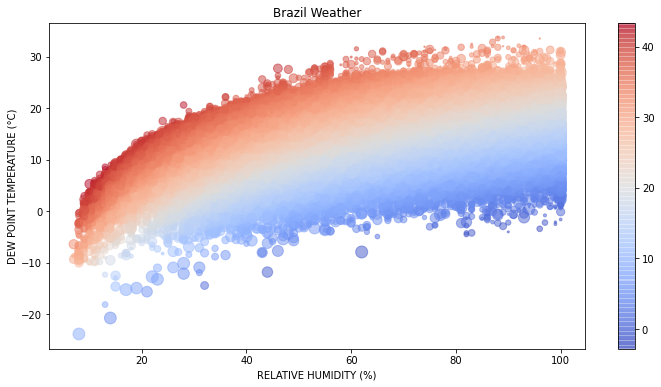

In [98]:
fig, ax = plt.subplots(figsize=[12,6])

x=sam_df['RELATIVE HUMIDITY (%)']
y=sam_df['DEW POINT TEMPERATURE (°C)']
s=(sam_df['WIND SPEED (m/s)']*20)

axs = ax.scatter(x, y, s, alpha= 0.5, c=sam_df['AIR TEMPERATURE - DRY BULB (°C)'], cmap='coolwarm')
ax.set_xlabel('RELATIVE HUMIDITY (%)')
ax.set_ylabel('DEW POINT TEMPERATURE (°C)')
ax.set_title('Brazil Weather')
fig.colorbar(axs)
plt.show();

From above graph,we concluded that the temperature is high when relative humidity is high.So the region which has higher temperature has higher relative humidity.

## Geographical feature analysis

### The hottest state of Brazil

In [99]:
hot_state=sam_df.groupby("UF")[['AIR TEMPERATURE - DRY BULB (°C)','ACCUMULATED PRECIPITATION HOURLY (mm)']].mean()

In [117]:
fig = go.Figure()

fig.add_trace(
    go.Bar(x=hot_state.index,y=hot_state["AIR TEMPERATURE - DRY BULB (°C)"]
           ,name="Air temperature",marker=dict(color="seagreen")
               ))

fig = fig.update_xaxes(tickangle=45)

fig.add_annotation(
    x="RN",
    y=29.49483,
    xref="x",
    yref="y",
    text="max=29.5 °C",
    showarrow=True,
    font=dict(
        family="Courier New,monospace",
        size=16,
        color="white"
    ),
    align="center",
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="black",
    ax=20,
    ay=-30,
    bordercolor="white",
    borderwidth=2,
    borderpad=4,
    bgcolor="black",
    opacity=0.8
)


fig.add_annotation(
    x="SC",
    y=20.35476,
    xref="x",
    yref="y",
    text="min=20.4 °C",
    showarrow=True,
    font=dict(
        family="Courier New,monospace",
        size=16,
        color="white"
    ),
    align="center",
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="black",
    ax=20,
    ay=-30,
    bordercolor="white",
    borderwidth=2,
    borderpad=4,
    bgcolor="black",
    opacity=0.8
)
    

fig.update_layout(
    title="Air temperature of States of Brazil",
    xaxis_title="States of Brazil",
    yaxis_title="Temperature(°C)",
    legend_title="Graph type",
    font=dict(
        size=15,
        color="black"
    ))

fig.show();

From above graph we know that the state(RN) has highest temperature i.e. **29.5 °C** and state(SC) has lowest temperature i.e. **20.4 °C**.

### The state has maximum rain

In [119]:
fig = go.Figure()

fig.add_trace(
    go.Line(x=hot_state.index,y=hot_state["ACCUMULATED PRECIPITATION HOURLY (mm)"],mode="markers+lines"
           ,name="Precipitation per hour",marker=dict(color="steelblue")
               ))

fig = fig.update_xaxes(tickangle=45)

fig.add_annotation(
    x="AP",
    y=0.3911469,
    xref="x",
    yref="y",
    text="max=0.4 mm/hour",
    showarrow=True,
    font=dict(
        family="Courier New,monospace",
        size=16,
        color="white"
    ),
    align="center",
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="black",
    ax=20,
    ay=-30,
    bordercolor="white",
    borderwidth=2,
    borderpad=4,
    bgcolor="black",
    opacity=0.8
)

    

fig.update_layout(
    title="Precipitation in the States of Brazil",
    xaxis_title="States of Brazil",
    yaxis_title="Precipitation(mm) per hour",
    legend_title="Graph type",
    font=dict(
        size=15,
        color="black"
    ))

fig.show();

C:\Users\sushr\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## Conclusion:

Due to its unique continental dimensions, Brazil possesses a wide variety of climates, influenced by its geographical configuration, its significant coastline, its relief, and the dynamics of the masses of air on its territory.  This last factor is perhaps of the greatest importance, because it acts directly on the temperatures in the different areas of the nation.So the dataset **Brazil Weather Automatic Stations(2000-2021)** has many relavant informations about weather of Brazil.It is the vast collection of data regarding weather done by **Automatic meteorological stations of the National Institute of Meteorology - INMET**.So we have done analysis of precipitation,wind-speed,air-temperature as well as geographical feature on basis of time and place.The knowledge gained from above analysis helped us to know precisely about weather of Brazil as well as it's geographical structure.